# DEVTOOLS

Devtools est une collection des outils de developement d'un paquet R. Pour ce paquet y a dix-huit versions dont les dates de mise en ligne au dessous. Au fur et à mesure des version, des fonctionnalité importante ont été rajouté comme install(), instal_github() en selectionnant username/repo, install_deps() pour installer les dependance de paquet, add_test_infrastructure() pour créer un test d'infrastructure pour un nouveau paquet. 


il faut récupérer le dossier devtoolsVersion ou on les descriptions files de chaque version de devtools

In [4]:
__author__ = 'narjissetabout'
import numpy as np
import matplotlib.pyplot as plt


for i in range(1, 19):
    fichier = open("le chemin vers les version devtools " + str(i) + "/DESCRIPTION", "r")
    entete = fichier.readlines()

    version = filter(lambda x: x.startswith("Version:"), entete)[0][9:]
    date = filter(lambda x: x.startswith("Date/Publication:"), entete)[0][18:]
    maintainer = filter(lambda x: x.startswith("Maintainer:"), entete)[0][13:]
    print(version.replace("\n", "") + " -> " + date)

0.1 -> 2011-06-22 20:30:54

0.2 -> 2011-06-29 09:41:48

0.3 -> 2011-06-30 17:01:02

0.4 -> 2011-07-23 15:55:09

0.5 -> 2011-12-04 09:26:38

0.5.1 -> 2011-12-07 17:07:26

0.6 -> 2012-02-28 08:37:05

0.7 -> 2012-06-19 19:40:09

0.7.1 -> 2012-07-02 15:41:13

0.8 -> 2012-09-14 19:34:20

1.0 -> 2013-01-22 18:42:24

1.1 -> 2013-02-09 08:02:07

1.2 -> 2013-04-17 13:42:43

1.3 -> 2013-07-04 18:54:22

1.4 -> 2013-11-20 16:57:31

1.4.1 -> 2013-11-27 19:34:19

1.5 -> 2014-04-07 20:38:41

1.6.1 -> 2014-10-07 22:06:39



Jetons un coup d'oeil sur le nombre de téléchargement de ces versions au cours du temps entre début 2013 jusq'au fin 2014. Pour faire il faut recupérer les fichiers csv sur http://cran-logs.rstudio.com ou y a les téléchargement de chaque jour des paquets CRAN.

In [8]:
import wget
import csv
from datetime import timedelta

import datetime

date = datetime.datetime(2012,12,31)


for i in range(730):
    date += datetime.timedelta(days=1)
    day = date.strftime('%Y-%m-%d')
    down13 = wget.download('http://cran-logs.rstudio.com/2013/'+str(day)+'.csv.gz')

Puis on filtre par rapport à Devtools pour les paquet téléchargé:

In [ ]:
import csv, gzip
import datetime

date = datetime.datetime(2012,12,31)
datebase = datetime.datetime(2013,01,01)


for i in range(730):
    date += datetime.timedelta(days=1)
    date = datebase + datetime.timedelta(days=i)
    day = date.strftime('%Y-%m-%d')
    src = gzip.open("mon chemin vers les fichiers téléchargé"+str(day)+".csv.gz", "r")
    #jusqu'ici j'ouvre mes fichier 
    try:
        reader = csv.DictReader(src)
        reader.next()
        #count2 = {'1.2':0, '1.3':0, '1.4':0, '1.4.1':0, '1.5':0, '1.6':0, '1.6.1':0}
        count = {'devtools': 0}
        for row in reader:
            package = row['package']
            if package in count.keys():
                    count[package] = count[package] + 1
        #print(count)
        #je redirige mes outputs
        for x in count:
            print ("\t%s" %  count[x]),
        print ""
    finally:
        src.close()

Depuis un terminal je lance mon script et je récupère des données dans un fichier .txt puis je passe au plot (il faut récupérer le fichier dataDevDown.txt pour faire le plot)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

endate = datetime.datetime(2012, 12,31)
startdate = datetime.datetime(2013,01,01)


info = open('dataDevDown.txt', 'r')  #le fichier que je récupère .txt avant
values = map(lambda x: int(x.strip()), info.readlines())
df = pd.DataFrame({'dl': values}, index=pd.date_range('2013-01-01', '2014-12-31', freq='1D'))
df1 = pd.stats.moments.rolling_sum(df, 30).rename(columns={'dl': 'sum'})

df1.plot()


le résultat du plot je l'ai enregistré (sumDevtoolsDown.png à récupérer)

In [15]:
from IPython.display import Image

In [19]:
i = Image(filename='/Users/narjissetabout/sumDevtoolsDown.png')

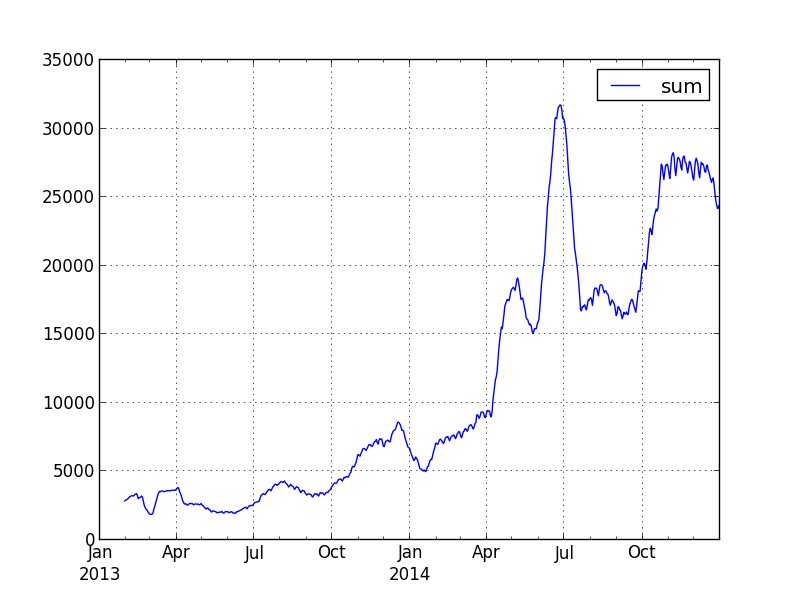

In [20]:
i

On remarque que y a une augmentation du nombre de téléchargement de devtools à la fin de 2013 ce qui corréspond à la version 1.4 et y a un pique vers juin 2014 ou on a le version 1.5.

fonctions de la version 1.5:

add_test_infrastructure() : créer un test d'infrastructure pour un nouveau paquet

add_rstudio_project() : rajouter un fichier Rstudio au paquet

add_travis(): rajoute un modele arvis basique au paquet

add_buil_ignore(): rend la tache facile pour rajouter des fichiers à .Rbuildignore

fonctions de la version 1.4:

install_github(): installer depuis Github un paquet en donnant le username/repo

install_version(): une nouvelle structure de méta-données sur CRAN.

install_deps(): installer les dependance du paquet.